## Image Pyramids

In [1]:
import cv2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
A=cv2.imread("apple.jpg")

In [4]:
B=cv2.imread("tomato.jpeg")

In [5]:
A.shape

(1024, 964, 3)

In [6]:
B.shape

(474, 474, 3)

## Gaussian Pyramid

In [7]:
G=A.copy()
gpA=[G]
for i in range(6):
    G=cv2.pyrDown(G)
    gpA.append(G)

In [8]:
G=cv2.pyrUp(B.copy())
gpB=[G]
for i in range(6):
    G=cv2.pyrDown(G)
    gpB.append(G)

In [9]:
gpA[0].shape

(1024, 964, 3)

In [10]:
gpB[0].shape

(948, 948, 3)

## Laplacian Pyramid

In [11]:
lpA=[gpA[-1]]
for i in range(6,0,-1):
    GE=cv2.pyrUp(gpA[i])
    L=cv2.subtract(gpA[i-1],GE[:gpA[i-1].shape[0],:gpA[i-1].shape[1],:])
    lpA.append(L)

In [12]:
lpB=[gpB[-1]]
for i in range(6,0,-1):
    GE=cv2.pyrUp(gpB[i])
    L=cv2.subtract(gpB[i-1],GE[:gpB[i-1].shape[0],:gpB[i-1].shape[1],:])
    lpB.append(L)

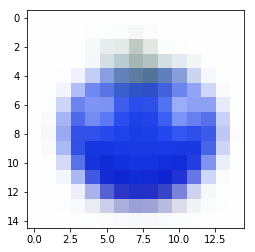

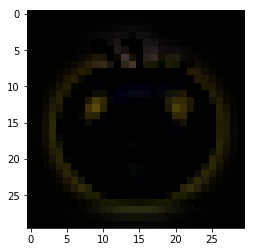

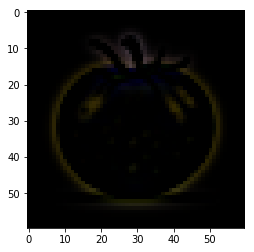

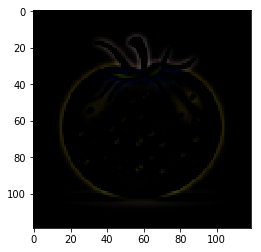

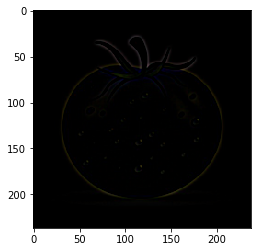

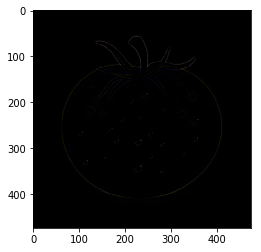

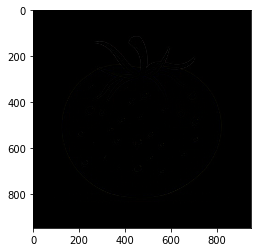

In [13]:
for img in lpB:
    plt.figure()
    plt.imshow(img)

## Hybrid the image

In [14]:
LS=[]

In [15]:
for la,lb in zip(lpA,lpB):
    rows1,cols1,dpt1=la.shape
    rows2,cols2,dpt2=lb.shape
    ls=la.copy()
    ls[int(rows1/2):int(rows1/2+rows2/2),int((cols1-cols2)/2):int(cols1/2+cols2/2),:]=lb[rows2-int(rows1/2+rows2/2)+int(rows1/2):,:,:]
    LS.append(ls)
    
    

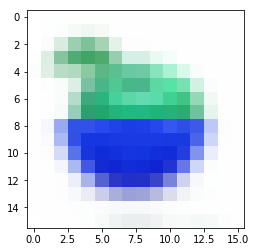

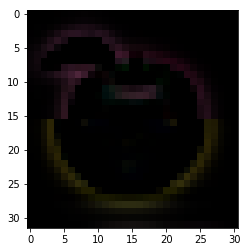

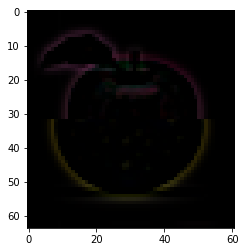

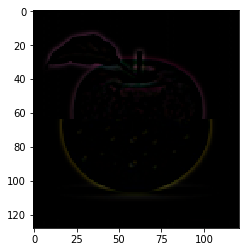

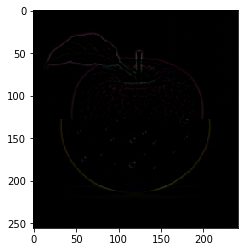

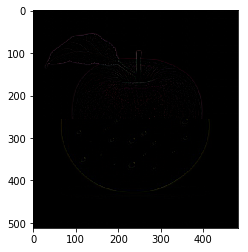

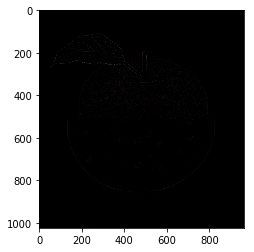

In [16]:
for img in LS:
    plt.figure()
    plt.imshow(img)

## Reconstruct

In [17]:
ls_=LS[0]

In [18]:
for i in range(1,6):
    ls_=cv2.pyrUp(ls_)
    ls_=cv2.add(ls_[:LS[i].shape[0],:LS[i].shape[1],:],LS[i])

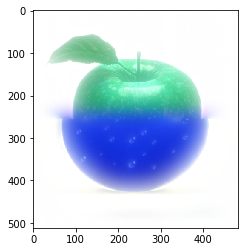

In [19]:
plt.imshow(ls_)